<a href="https://colab.research.google.com/github/Graziottomp/Curso_SER-347_CAP-419_INPE_2022/blob/main/Tarefa_Semana_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**(a)** abra as 2 imagens utilizando a GDAL, e gere uma visualização de cada imagem e de seu histograma

In [ ]:
#importando as bibliotecas utilizadas

from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np

#informar o uso de exceções
gdal.UseExceptions()

#abrir as imagens
dataset_t1 = gdal.Open("CBERS_4_PAN5M_20150712_154_126_L4_BAND1_crop.tif", \
                    gdal.GA_ReadOnly)

dataset_t2 = gdal.Open("CBERS_4_PAN5M_20180924_154_126_L4_BAND1_crop.tif", \
                    gdal.GA_ReadOnly)



In [ ]:
#obtendo as bandas
bandat1 = dataset_t1.GetRasterBand(1)
bandat2 = dataset_t2.GetRasterBand(1)

#obtendo matrizes de pixels das bandas
matrizt1 = bandat1.ReadAsArray().astype(int)
matrizt2 = bandat2.ReadAsArray().astype(int)

Text(0.5, 1.0, 'Imagem $t_2$')

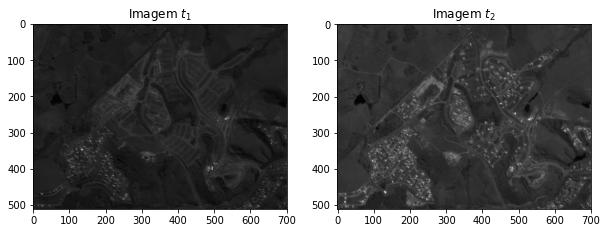

In [ ]:
#plotando as imagens

plt.figure (figsize=(10,10))
plt.subplot(121)
plt.imshow(matrizt1, cmap= 'gray')
plt.title(r'Imagem $t_1$')
plt.subplot(122)
plt.imshow(matrizt2, cmap= 'gray')
plt.title(r'Imagem $t_2$')

Text(0.5, 1.0, 'Histograma $t_2$')

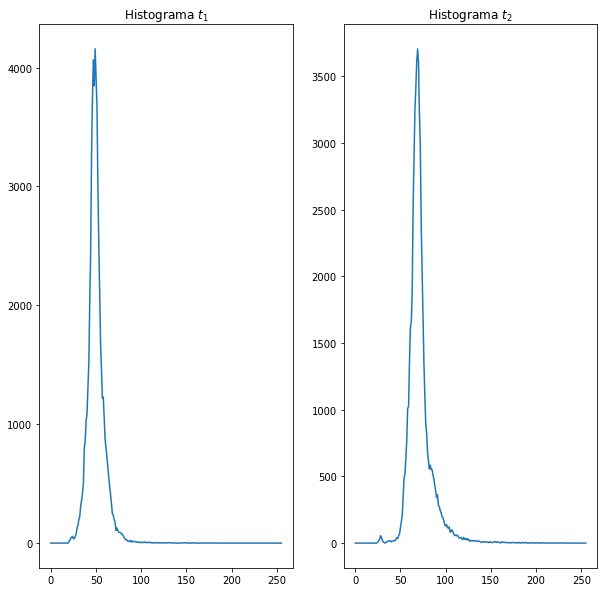

In [ ]:
#plotando Histograma
plt.figure (figsize=(10,10))
plt.subplot(121)
plt.plot(bandat1.GetHistogram())
plt.title(r'Histograma $t_1$')
plt.subplot(122)
plt.plot(bandat2.GetHistogram())
plt.title(r'Histograma $t_2$')

**(b)** crie uma nova matriz *delta = t2 - t1* utilizando os operadores aritméticos da NumPy. Gere uma visualização desta matriz, e apresente um scatterplot contendo como eixos, as imagens  t1,t2 .

Observação: Veja que a imagem  t1  possui uma linha a mais que a imagem  t2 . Você precisará ajustar a imagem  t1  descartando a última linha.

In [ ]:
#ajustando a matriz t1, removendo a ultima linha
linhas = matrizt1.shape[0]
matrizt1_modificada = matrizt1.copy()[0:linhas-1, :]


#criando a matriz delta
delta = matrizt2 - matrizt1_modificada

#criando os vetores para o scatterplot
vetort1 = matrizt1_modificada.flatten()
vetort2 = matrizt2.flatten()


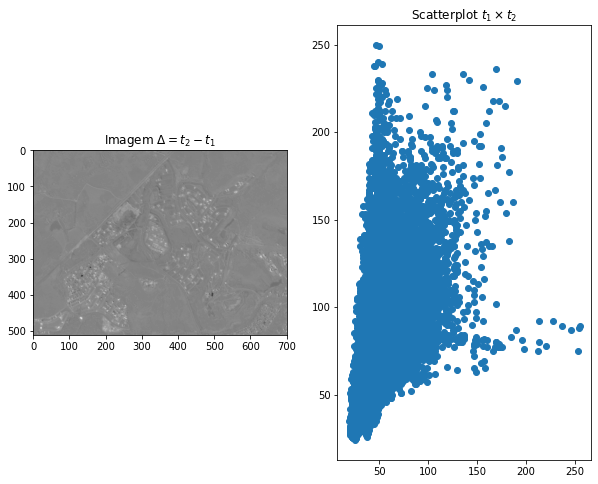

In [ ]:
#plotar a imagem e o scatterplot

plt.figure(figsize=(10,8))
plt.subplot(121)
plt.imshow(delta, cmap= 'gray')
plt.title(r'Imagem $\Delta = t_2 - t_1$')
plt.subplot(122)
plt.scatter(vetort1, vetort2)
plt.title(r'Scatterplot $t_1 \times t_2$');

**(c)** verifique os limites mínimos e máximos da matriz resultante, e defina um intervalo de pixels que você considera como mudança e um intervalo que considera como não mudança. A partir destes intervalos, gere uma visualização de uma classificação de mudança versus não mudança.

In [ ]:
#Esolhendo o limite 50, tendo como guia o scatterplot
limiar = 50

#criando a classificacao usando where
classificacao = np.where(delta > limiar, 1,
                         np.where(delta < -limiar, -1, 0))

Text(0.5, 1.0, 'Mudança (-1 ou 1) $\\times$ Não mudança (0)')

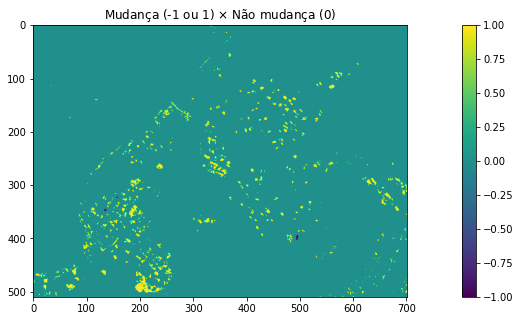

In [ ]:
#plotando a classificacao
plt.figure(figsize=(20,5))
plt.imshow(classificacao)
plt.colorbar()
plt.title(r'Mudança (-1 ou 1) $\times$ Não mudança (0)')